# Cars price prediction

## I. Data import

In [177]:
import pandas as pd
import numpy as np
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ScrapyParser/kolesa_cars.csv')
df

,manufacturer,model,price,year,body,engine_volume,fuel_type,transmission,city,date
0,Renault,Megane,1 800 000,2004,седан,1.4,бензин,механика,Актобе,29 марта
1,ВАЗ (Lada),2131 (5-ти дверный),1 055 000,2004,внедорожник,1.8,бензин,механика,Актобе,29 марта
2,Chevrolet,Orlando,8 000 000,2013,минивэн,1.8,бензин,автомат,Актобе,29 марта
3,Kia,Cee’d,6 300 000,2013,хэтчбек,1.6,бензин,автомат,Актобе,29 марта
4,Toyota,Camry,17 000 000,2018,седан,2.5,бензин,автомат,Актобе,29 марта
...,...,...,...,...,...,...,...,...,...,...
131475,Toyota,Camry,6 500 000,2006,седан,2.4,бензин,автомат,Актобе,29 марта
131476,BMW,320,3 600 000,2002,седан,2.2,бензин,автомат,Актобе,29 марта
131477,ГАЗ,ГАЗель,6 700 000,2013,пикап,2.9,газ-бензин,механика,Актобе,29 марта
131478,ВАЗ (Lada),Priora 2170 (седан),3 200 000,2014,седан,1.6,бензин,механика,Актобе,29 марта


## II. Data cleaning

#### Remove duplicates
Due to the inherent nature of the repetition of ads and due to the technical specifics of the parser, there are duplicates in the dataset that need to be removed.

In [178]:
print(f'Total amount of rows: {len(df)}\n'
      f'Total amount of duplicates: {len(df)-len(df.drop_duplicates())}')
df = df.drop_duplicates()
print(f'New amount: {len(df)}')

Total amount of rows: 131480
Total amount of duplicates: 15759
New amount: 115721


#### Drop useless columns
The parsing occurred on March 29 and, accordingly, the date in the column is only 7 days. This data is useless.

In [179]:
print(f"All days in dataset: {df['date'].unique()}")
df.drop('date', inplace=True, axis=1)

All days in dataset: ['29 марта' '25 марта' '23 марта' '24 марта' '26 марта' '28 марта'
 '27 марта' '30 марта']


#### Drop garbage rows
Parser may set wrong values for some columns, let's check their status.

In [180]:
print(f'Manufacturer: OK\n{df.manufacturer.unique()}\n\n'
      f'Model: OK\n{df.model.unique()}\n\n'
      f'Price: OK\n{df.price.unique()}\n\n'
      f'Year: OK\n{df.year.unique()}\n\n'
      f'Body: BAD\n{df.body.unique()}\n\n'
      f'Engine volume: BAD\n{df.engine_volume.unique()}\n\n'
      f'Fuel type: BAD\n{df.fuel_type.unique()}\n\n'
      f'Transmission: BAD\n{df.transmission.unique()}\n\n'
      f'City: Ok\n{df.city.unique()}\n\n')

Manufacturer: OK
['Renault' 'ВАЗ (Lada)' 'Chevrolet' 'Kia' 'Toyota' 'Nissan' 'Opel'
 'Hyundai' 'ГАЗ' 'Daewoo' 'Skoda' 'Mitsubishi' 'Volkswagen' 'Lexus'
 'Geely' 'УАЗ' 'SsangYong' 'Mercedes-Benz' 'Ford' 'BMW' 'Audi' 'Changan'
 'Subaru' 'FAW' 'Great Wall' 'Porsche' 'Mazda' 'Honda' 'Москвич'
 'Infiniti' 'Suzuki' 'Haval' 'Land Rover' 'Ravon' 'Dodge' 'Mini' 'Peugeot'
 'JAC' 'ЗАЗ' 'Derways' 'Foton' 'ИЖ' 'Fiat' 'Lincoln' 'Lifan' 'Jaguar'
 'Chery' 'Datsun' 'Daihatsu' 'Citroen' 'Chrysler' 'Volvo' 'Isuzu' 'Seat'
 'Cadillac' 'Jeep' 'GMC' 'Hummer' 'Alfa Romeo' 'MG' 'ЛуАЗ' 'DongFeng'
 'Acura' 'Pontiac' 'Shuanghuan' 'Bentley' 'Saab' 'ТагАЗ' 'Tianma' 'BYD'
 'Ретро-автомобили' 'Hafei' 'ЗиЛ' 'Lancia' 'ZX' 'Rover' 'ВИС' 'Haima'
 'Smart' 'Maserati' 'Wuling' 'Genesis' 'Jin' 'GAC' 'Tesla' 'РАФ' 'Gonow'
 'Dacia' 'Iran Khodro' 'Mercedes-Maybach' 'Rolls-Royce' 'Buick' 'Scion'
 'Mercury' 'Aston Martin' 'BAIC' 'Maybach' 'Ferrari' 'Dayun' 'Lamborghini'
 'Puch' 'Huanghai' 'BAW' 'Mahindra' 'Tianye']

Model: OK
['M

As we can see engine_volume, body, fuel_type, transmission columns has some garbage rows, we will delete them.

In [181]:
df['engine_volume'] = df['engine_volume'].astype(str)
df['engine_volume'] = df['engine_volume'].apply(lambda x: None if x in ['газ', 'бензин', 'электричество'] else x)
df['body'] = df['body'].apply(lambda x: None if x.strip()=='л' else x)
df['fuel_type'] = df['fuel_type'].apply(lambda x: None if x in ['КПП Автомат', 'КПП механика', 'правый руль'] else x)
df['transmission'] = df['transmission'].apply(lambda x: x if x in ['механика', 'автомат', 'вариатор', 'робот'] else None)
df.dropna(inplace=True)

Now these columns are good to go.

In [182]:
print(f'Body: OK\n{df.body.unique()}\n\n'
      f'Engine volume: OK\n{df.engine_volume.unique()}\n\n'
      f'Fuel type: OK\n{df.fuel_type.unique()}\n\n'
      f'Transmission: OK\n{df.transmission.unique()}\n\n')

Body: OK
['седан' 'внедорожник' 'минивэн' 'хэтчбек' 'универсал' 'фургон'
 'кроссовер' 'лифтбек' 'пикап' 'микроавтобус' 'купе' 'родстер' 'микровэн'
 'лимузин' 'кабриолет' 'хардтоп' 'фастбек' 'тарга']

Engine volume: OK
['1.4' '1.8' '1.6' '2.5' '3' '4.5' '2' '1.5' '2.7' '2.9' '0.8' '2.4' '1.7'
 '4.6' '2.3' '3.5' '2.8' '4' '1.3' '4.7' '5.5' '2.2' '1.1' '3.6' '3.3'
 '3.2' '2.6' '2.1' '4.4' '5.7' '1.2' '1.9' '6' '3.4' '4.8' '5' '4.3' '5.6'
 '3.8' '1' '5.4' '4.2' '3.7' '3.1' '6.2' '6.3' '3.9' '5.3' '8.5' '0.7'
 '0.9' '6.5' '9.9' '7.7' '1.69' '0.6' '6.1' '5.9' '0.2' '4.9' '5.2' '8.3'
 '6.8' '9' '5.8' '0.1' '6.6' '7.4' '6.7' '8.2' '6.4' '4.497' '8.1' '2.99'
 '7.3' '2.01' '8' '2.0' '4.0' '3.0' '5.0']

Fuel type: OK
['бензин' 'газ-бензин' 'дизель' 'гибрид' 'газ' 'электричество']

Transmission: OK
['механика' 'автомат' 'вариатор' 'робот']




As the result of data cleaning:
Rows amount at the start: 131480
Rows amount after duplicates removed: 115721
Rows amount after garbage rows are removed: 109483

In [183]:
df

,manufacturer,model,price,year,body,engine_volume,fuel_type,transmission,city
0,Renault,Megane,1 800 000,2004,седан,1.4,бензин,механика,Актобе
1,ВАЗ (Lada),2131 (5-ти дверный),1 055 000,2004,внедорожник,1.8,бензин,механика,Актобе
2,Chevrolet,Orlando,8 000 000,2013,минивэн,1.8,бензин,автомат,Актобе
3,Kia,Cee’d,6 300 000,2013,хэтчбек,1.6,бензин,автомат,Актобе
4,Toyota,Camry,17 000 000,2018,седан,2.5,бензин,автомат,Актобе
...,...,...,...,...,...,...,...,...,...
131474,ВАЗ (Lada),Priora 2170 (седан),2 700 000,2013,седан,1.6,бензин,механика,Актобе
131476,BMW,320,3 600 000,2002,седан,2.2,бензин,автомат,Актобе
131477,ГАЗ,ГАЗель,6 700 000,2013,пикап,2.9,газ-бензин,механика,Актобе
131478,ВАЗ (Lada),Priora 2170 (седан),3 200 000,2014,седан,1.6,бензин,механика,Актобе


## III. Data preparation
Only "year" columns has appropriate type. So we will cast each of other columns.

In [184]:
df.dtypes

manufacturer     object
model            object
price            object
year              int64
body             object
engine_volume    object
fuel_type        object
transmission     object
city             object
dtype: object

We will give columns consisting of digits the correct types

In [185]:
df['price'] = df['price'].apply(lambda x: x.replace(' ', '')).astype(int)
df['engine_volume'] = df['engine_volume'].astype(float)

Transmission and fuel type has few categories, so we will turn them into binary columns

In [186]:
df = df.join(pd.get_dummies(df.transmission))
df = df.join(pd.get_dummies(df.fuel_type))
df = df.join(pd.get_dummies(df.body))

Turn big categorical columns to numbers, where 0 is the cheapest category.

In [187]:
for col in ['manufacturer', 'model', 'city']:
      ordered_dict = {
            d:i for i,d in enumerate(dict(sorted({c:df[df[col]==c].price.mean() for c in df[col].unique()}.items(), key=lambda item: item[1])[::-1]))
      }
      df[col] = df[col].apply(lambda x: ordered_dict[x]).astype(int)

We don't want to overfit our model with many columns, so we can not just make dummy values from columns as manufacturer, model, body, city. We will drop them.

In [188]:
df_num = df.drop(['fuel_type', 'transmission', 'body'], axis=1)
df_num

,manufacturer,model,price,year,engine_volume,city,автомат,вариатор,механика,робот,...,минивэн,пикап,родстер,седан,тарга,универсал,фастбек,фургон,хардтоп,хэтчбек
0,35,1284,1800000,2004,1.4,11,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,77,1225,1055000,2004,1.8,11,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,36,801,8000000,2013,1.8,11,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,29,758,6300000,2013,1.6,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,21,608,17000000,2018,2.5,11,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131474,77,1179,2700000,2013,1.6,11,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
131476,34,1256,3600000,2002,2.2,11,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
131477,50,931,6700000,2013,2.9,11,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
131478,77,1179,3200000,2014,1.6,11,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


At the end, we have ready for regression, filled only with numeric values dataframe

In [189]:
df_num.dtypes

manufacturer       int64
model              int64
price              int64
year               int64
engine_volume    float64
city               int64
автомат            uint8
вариатор           uint8
механика           uint8
робот              uint8
бензин             uint8
газ                uint8
газ-бензин         uint8
гибрид             uint8
дизель             uint8
электричество      uint8
внедорожник        uint8
кабриолет          uint8
кроссовер          uint8
купе               uint8
лимузин            uint8
лифтбек            uint8
микроавтобус       uint8
микровэн           uint8
минивэн            uint8
пикап              uint8
родстер            uint8
седан              uint8
тарга              uint8
универсал          uint8
фастбек            uint8
фургон             uint8
хардтоп            uint8
хэтчбек            uint8
dtype: object

## IV. Regression

In [190]:
y = df_num.price
df_num.drop(['price'], axis=1, inplace=True)
X = df_num
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
model_metrics = {}

Let's choose several default regression models to hypertune.

In [191]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['LinearRegression'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['LinearRegression']])

[0.547986670824313, 3090033.0111851012, 29487790776800.92]


> Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [192]:
model = ElasticNet()
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['ElasticNet'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['ElasticNet']])

[0.5237759117084329, 3183012.2085543023, 31067217208004.926]


>Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates. The output or response 'y' is assumed to drawn from a probability distribution rather than estimated as a single value.

In [193]:
model = BayesianRidge()
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['BayesianRidge'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['BayesianRidge']])

[0.5480913285308149, 3089429.8515056954, 29480963268952.562]


>Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [194]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['GradientBoostingRegressor'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['GradientBoostingRegressor']])

[0.8994463768307922, 1150164.018548562, 6559771605120.991]


>Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [195]:
model = LGBMRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['LGBMRegressor'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['LGBMRegressor']])

[0.9489350094239876, 866890.9777756706, 3331303881836.4077]


In [196]:
model = XGBRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['XGBRegressor'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['XGBRegressor']])

[0.9570128284387328, 780635.5275361297, 2804334826578.5474]


>The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) and thus through greedy search create a strong competitive predictive model.

In [197]:
model = CatBoostRegressor(silent=True)
model.fit(X_train,y_train)
pred = model.predict(X_test)

model_metrics['CatBoostRegressor'] = [
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
]
print([x for x in model_metrics['CatBoostRegressor']])

Learning rate set to 0.082159
0:	learn: 7733273.3536704	total: 6.92ms	remaining: 6.92s
1:	learn: 7269122.4377391	total: 13.1ms	remaining: 6.54s
2:	learn: 6847917.9007232	total: 18.5ms	remaining: 6.14s
3:	learn: 6453576.7303569	total: 23.8ms	remaining: 5.92s
4:	learn: 6099671.8672691	total: 29.3ms	remaining: 5.84s
5:	learn: 5771385.5985980	total: 34.8ms	remaining: 5.77s
6:	learn: 5489561.0778667	total: 40.2ms	remaining: 5.7s
7:	learn: 5220905.0944556	total: 45.3ms	remaining: 5.62s
8:	learn: 4981891.3497596	total: 49.9ms	remaining: 5.49s
9:	learn: 4767746.1094837	total: 66.7ms	remaining: 6.61s
10:	learn: 4576863.0044434	total: 74.6ms	remaining: 6.71s
11:	learn: 4407426.4645345	total: 80.3ms	remaining: 6.61s
12:	learn: 4244615.3286759	total: 96.7ms	remaining: 7.34s
13:	learn: 4099939.8326949	total: 103ms	remaining: 7.25s
14:	learn: 3968528.1240317	total: 109ms	remaining: 7.18s
15:	learn: 3856862.0566667	total: 115ms	remaining: 7.08s
16:	learn: 3751578.5956804	total: 120ms	remaining: 6.96s

In [198]:
for k,v in model_metrics.items():
      print(k,v)

LinearRegression [0.547986670824313, 3090033.0111851012, 29487790776800.92]
ElasticNet [0.5237759117084329, 3183012.2085543023, 31067217208004.926]
BayesianRidge [0.5480913285308149, 3089429.8515056954, 29480963268952.562]
GradientBoostingRegressor [0.8994463768307922, 1150164.018548562, 6559771605120.991]
LGBMRegressor [0.9489350094239876, 866890.9777756706, 3331303881836.4077]
XGBRegressor [0.9570128284387328, 780635.5275361297, 2804334826578.5474]
CatBoostRegressor [0.9574641759382865, 790164.7988022688, 2774890472230.102]


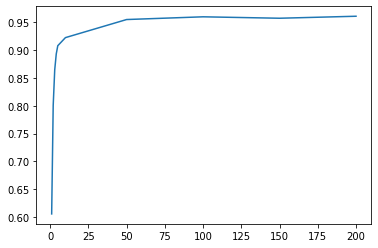

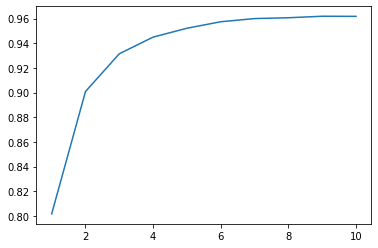

In [199]:
from matplotlib import pyplot as plt
#
iter_scores = {}
for iter in [1,2,3,4,5,10,50,100,150, 200]:
      model = CatBoostRegressor(silent=True, iterations=iter, depth=10)
      model.fit(X_train,y_train)
      pred = model.predict(X_test)
      iter_scores[iter] = r2_score(y_test, pred)
plt.plot(iter_scores.keys(), iter_scores.values())
plt.show()

depth_scores = {}
for dep in [1,2,3,4,5,6,7,8,9,10]:
      model = CatBoostRegressor(silent=True, depth=dep)
      model.fit(X_train,y_train)
      pred = model.predict(X_test)
      depth_scores[dep] = r2_score(y_test, pred)
plt.plot(depth_scores.keys(), depth_scores.values())
plt.show()

In [200]:
model = CatBoostRegressor(iterations=5000, depth=10, silent=True)
model.fit(X_train,y_train)
pred = model.predict(X_test)

print(
      r2_score(y_test, pred),
      mean_absolute_error(y_test,pred),
      mean_squared_error(y_test,pred)
)


0.9636130608587884 726071.8137377534 2373758425135.2876
